In [59]:
from matplotlib import pyplot as plt
import pandas as pd

from passwords import username
from passwords import password

In [61]:
from sqlalchemy import create_engine
engine = create_engine("postgresql://" + username + ":" + password + "@localhost:5432/Employee_db")
connection = engine.connect()

In [ ]:
# Get salaries from dB
sql = "SELECT salary FROM salaries"
salaries = pd.read_sql(sql,connection)

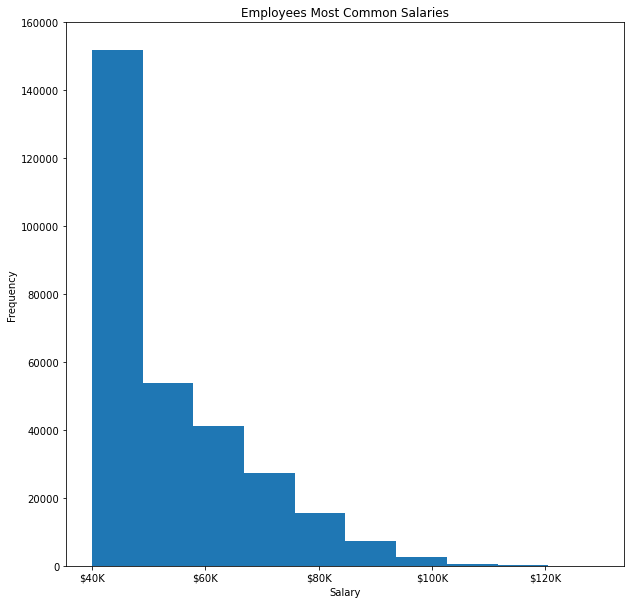

In [40]:
# Create a histogram to visualize the most common salary ranges for employees.

fig, axis = plt.subplots(figsize = (10,10))
axis.hist(salaries, bins= 10)

plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("Employees Most Common Salaries")

plt.xticks([40000, 60000, 80000, 100000, 120000],["$40K","$60K","$80K","$100K","$120K"] )
plt.yticks([0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000])

plt.show()

In [48]:
# Create a bar chart of average salary by title.

sql = "SELECT AVG(s.salary) as salary, t.title FROM employees as e \
        INNER JOIN salaries as s ON e.emp_no = s.emp_no \
        INNER JOIN titles as t ON e.emp_title = t.title_id \
        GROUP BY t.title \
        ORDER BY t.title"
avg_salary = pd.read_sql(sql, connection)

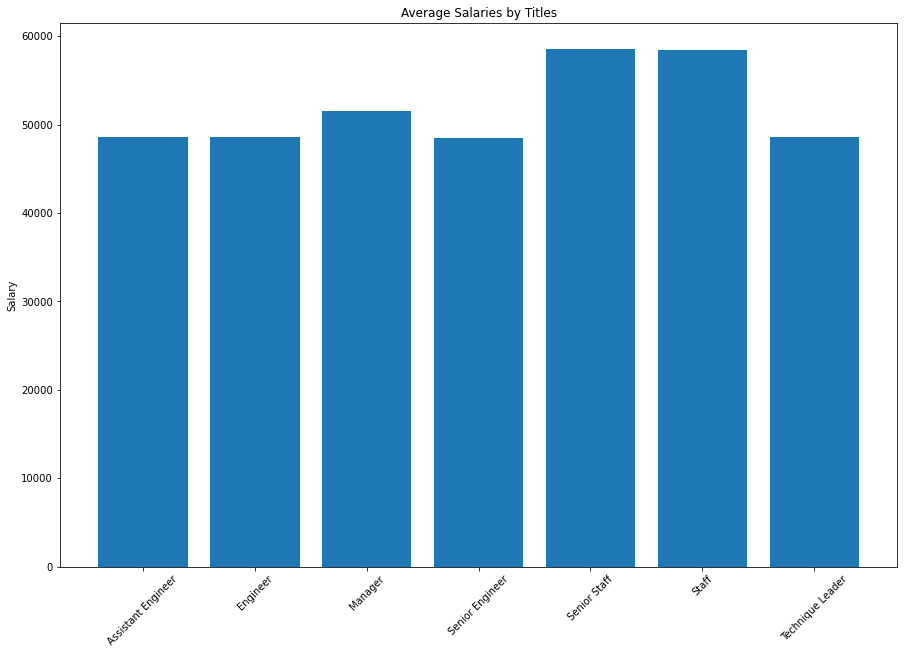

In [64]:
fig, axis = plt.subplots(figsize = (15,10))
plt.bar(avg_salary["title"], avg_salary["salary"])

plt.ylabel("Salary")
plt.title("Average Salaries by Titles")

plt.xticks(rotation=45)


plt.show()